<a href="https://colab.research.google.com/github/Faizal-Basha-S/SKILLCRAFT-TASK-3/blob/main/skillcraft_task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas scikit-learn matplotlib imbalanced-learn

In [ ]:
# Decision Tree Classifier with Enhancements for Bank Marketing Dataset

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV


In [ ]:
# Load the dataset
file_path = "bank-full.csv"  # Update this with the correct path in Colab
df = pd.read_csv(file_path, sep=";")


In [ ]:
# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoder for potential inverse transformations


In [ ]:
# Define features and target variable
X = df.drop(columns=['y'])  # Features
y = df['y']  # Target


In [ ]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [ ]:
# Hyperparameter tuning for Decision Tree
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 10], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
# Train the best Decision Tree Classifier
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, random_state=42)

In [ ]:
# Predictions
y_pred = best_clf.predict(X_test)


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy: 0.8795165633414741
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.88      7908
           1       0.86      0.91      0.88      8061

    accuracy                           0.88     15969
   macro avg       0.88      0.88      0.88     15969
weighted avg       0.88      0.88      0.88     15969

Confusion Matrix:
 [[6734 1174]
 [ 750 7311]]


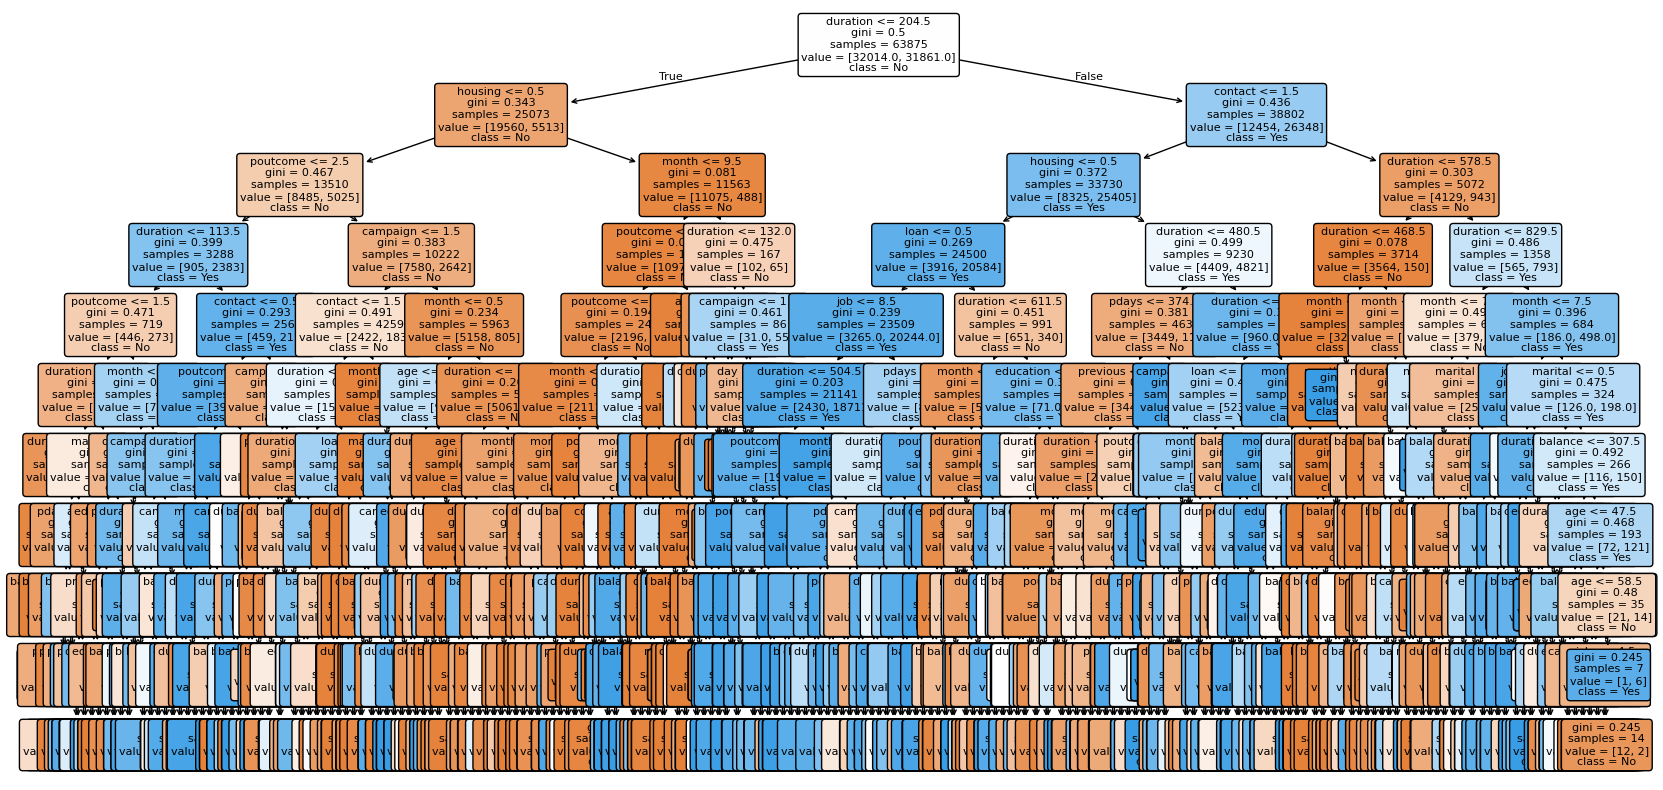

In [ ]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(best_clf, feature_names=X.columns, class_names=["No", "Yes"], filled=True, rounded=True, fontsize=8)
plt.show()
